## HomeWork 1 Due at Mid-night 9/16/2019

## Deveshwar Singh

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [123]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [124]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading MPG dataset ##

In [125]:
mpg = pd.read_csv("mpg2.csv")
print(mpg.shape)
mpg.head()

(400, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Question 1. Check if there are any null or NA

**Type in your code here**

In [126]:
mpg.isnull().any()#drops rows with nulls

mpg              True
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

## Question 2. Remove any rows that has null or NA

**Type in your code here**

In [127]:
print(mpg.shape) #shows how many rows and columns there are before null drop
mpg.dropna(inplace=True)
print(mpg.shape)#shows how many rows and columnd there are after null drop

(400, 9)
(393, 9)


## Question 3. Check if there is any outliers in the mpg field

**Type in your code here**

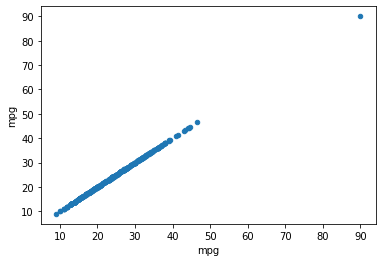

In [128]:
mpg.plot.scatter(x='mpg',y='mpg')#shows a scatter plot to visually see any outliers 

## Question 4. Display and then Remove the one outlier row. You should now have 392 rows

**Type in your code here**

In [129]:
mpg[mpg.mpg >60]#displaying the row with the outlier 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
9,90.0,8,451.0,450.0,2555,8.0,2020,usa,tesla model Y


In [130]:
print(mpg.shape)#displays the number of rows before removal of outlier
mpg = mpg[mpg.mpg < 60]#removes the outlier from the dataset
print(mpg.shape)#displays the number of rows after removal
mpg2=mpg#for use in question 9

(393, 9)
(392, 9)


## Question 5. Calculate the average acceleration cars made in usa using SQL

**Type in your code here**

In [131]:
sql ="select avg(acceleration), origin from mpg where origin ='usa'"
df = ps.sqldf(sql)
df

,avg(acceleration),origin
0,14.990204,usa


## Question 6. Calculate the average horsepower for each country using SQL

**Type in your code here**

In [132]:
sql = "select avg(horsepower), origin from mpg group by origin"
print(ps.sqldf(sql))

   avg(horsepower)  origin
0        80.558824  europe
1        79.835443   japan
2       119.048980     usa


## Question 7. Calculate the number of occurrences, mean, min, max of the weight for each country using SQL

**Type in your code here**

In [133]:
sql= "select count(weight) as occurrences, avg(weight) as mean, min(weight) as min, max(weight) as max, origin from mpg group by origin"
print(ps.sqldf(sql))

   occurrences         mean   min   max  origin
0           68  2433.470588  1825  3820  europe
1           79  2221.227848  1613  2930   japan
2          245  3372.489796  1800  5140     usa


## Question 8. Answer Question 7 but use Panada functions

**Type in your code here**

In [1]:
meanweight = mpg.groupby('origin')
meanweight= meanweight['weight'].mean()
minweight = mpg[['weight']].min()
occweight = mpg[['weight']].occurence()
print("mean",meanweight)
print("min",minweight)


NameError: name 'mpg' is not defined

## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the horsepower, weight and acceleration for each country

**Type in your code here**

In [141]:
#pg.kurtosis()
#mpg.skew()
mpg = mpg.groupby('origin')

mpgusa = mpg2[mpg2['origin']=='usa']
mpgeuro = mpg2[mpg2['origin']=='europe']
mpgjap = mpg2[mpg2['origin']=='japan']

stdhorsepower=mpg['horsepower'].std()
stdweight=mpg['weight'].std()
stdacceleration= mpg['acceleration'].std()


print("Standard deviation of horsepower",stdhorsepower,"\n")
print("Standard deviation of weight",stdweight,"\n")
print("Standard deviation of acceleration",stdacceleration,"\n\n")

skewhorsepower=mpg['horsepower'].skew()
skewweight=mpg['weight'].skew()
skewacceleration= mpg['acceleration'].skew()

print("Skew of horsepower",skewhorsepower,"\n")
print("Skew of weight",skewweight,"\n")
print("Skew of acceleration",skewacceleration,"\n\n")

kurtosishpusa = mpgusa['horsepower'].kurtosis()
kurtosishpeuro = mpgeuro['horsepower'].kurtosis()
kurtosishpjap = mpgjap['horsepower'].kurtosis()

kurtosisweusa = mpgusa['weight'].kurtosis()
kurtosisweeuro = mpgeuro['weight'].kurtosis()
kurtosiswejap = mpgjap['weight'].kurtosis()

kurtosisaccusa = mpgusa['acceleration'].kurtosis()
kurtosisacceuro = mpgeuro['acceleration'].kurtosis()
kurtosisaccjap = mpgjap['acceleration'].kurtosis()

print("kurtosis horsepower\n", "usa ",kurtosishpusa, "\neurope ", kurtosishpeuro,"\njapan ", kurtosishpjap)

print("\nkurtosis weight\n", "europe ",kurtosisweeuro, "\njapan ", kurtosiswejap,"\nusa ", kurtosisweusa)

print("\nkurtosis acceleration\n", "europe ",kurtosisacceuro, "\njapan ", kurtosisaccjap,"\nusa ", kurtosisaccusa)

Standard deviation of horsepower origin
europe    20.157871
japan     17.819199
usa       39.897790
Name: horsepower, dtype: float64 

Standard deviation of weight origin
europe    491.813867
japan     320.497248
usa       795.346690
Name: weight, dtype: float64 

Standard deviation of acceleration origin
europe    3.087813
japan     1.954937
usa       2.736020
Name: acceleration, dtype: float64 


Skew of horsepower origin
europe    0.472850
japan     0.660375
usa       0.763248
Name: horsepower, dtype: float64 

Skew of weight origin
europe    0.812081
japan     0.498497
usa       0.067009
Name: weight, dtype: float64 

Skew of acceleration origin
europe    0.945656
japan     0.042795
usa       0.098737
Name: acceleration, dtype: float64 


kurtosis horsepower
 usa  -0.18952147234329608 
europe  -0.05951411592299083 
japan  -0.1316959100231152

kurtosis weight
 europe  -0.24981293941037874 
japan  -0.3806248750860872 
usa  -0.9654941402866393

kurtosis acceleration
 europe  0.0362904

## Question 10. How would you describe the acceleration distribution for different country based on the Skew?

**Type in your answer here**

In [136]:
#For Europe the distribution median is close to the average from the positive side
#for Usa the distribution median is close to the average from the positive side
#For japan the distribution median isnt close to the average.

## Question 11. How would you describe the acceleration distribution for different country based on Kurotsis?

**Type in your answer here**

## Question 12. Plot the histogram of acceleration distribution for different country

**Type in your code here**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17afe940>,
      dtype=object)

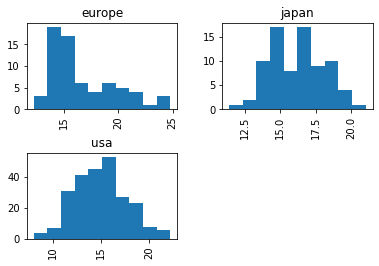

In [137]:
mpg['acceleration'].hist(by=mpg['origin'])

## Question 13. Calculate correlation of all the factors among themselves

**Type in your code here**

In [140]:
print("\ncorrelation of all data \n",mpg.corr())


correlation of all data 
                    mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model_year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              acceleration  model_year  
mpg               0.423329    0.580541  
cylinders        -0.504683   -0.345647  
displacement     -0.543800   -0.369855  
horsepower       -0.689196   -0.416361  
weight           -0.416839   -0.309120  
acceleration      1.000000    0.290316  
model_year        0.290316    1.000000  


## Question 14. Which factors (cylinders, horsepower or weight) will affect your mileage the most based on correlation?

**Type in your answer here**

Weight will affect the mileage the most based on correlation, whiles cylinders and horsepower are proportional in their affects on mpg(meaning the same amount).

## Question 15. Does the result depend on the country? If yes, how?

**Type in your code here**

The results do depend on the country because each country makes and import different types of vehicles, so the mpg will correlate to different factors per country.

In [139]:
print("\n\ncorrelation of data for USA \n",mpgusa.corr())
print("\n\ncorrelation of data for Europe \n",mpgeuro.corr())
print("\n\ncorrelation of data for Japan\n",mpgjap.corr())



correlation of data for USA 
                    mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.824524     -0.834628   -0.751570 -0.846424   
cylinders    -0.824524   1.000000      0.933885    0.827646  0.881609   
displacement -0.834628   0.933885      1.000000    0.902744  0.917588   
horsepower   -0.751570   0.827646      0.902744    1.000000  0.838450   
weight       -0.846424   0.881609      0.917588    0.838450  1.000000   
acceleration  0.377239  -0.563293     -0.619890   -0.719191 -0.440230   
model_year    0.648641  -0.463986     -0.497591   -0.495009 -0.406388   

              acceleration  model_year  
mpg               0.377239    0.648641  
cylinders        -0.563293   -0.463986  
displacement     -0.619890   -0.497591  
horsepower       -0.719191   -0.495009  
weight           -0.440230   -0.406388  
acceleration      1.000000    0.380878  
model_year        0.380878    1.000000  


correlation of data for Europe 
                    m

The data above proves my educated guess, as you can see cylinders has a higher correlation for europe
whiles Japan has a higher correlation for horsepower
UsA seems to not have a standout correlation as all 3 factors are close in correlation